<h1>
    <center>
        Predicting Laptop Prices
        </center>
</h1>

<h1>
    Using Supervised Machine Learning ALgorithms (Regressor) To the data
</h1>

## Introduction 

Here we will primarily focus on using machine learning algorithms such as 
Linear Regression,
KNN Regressor ,
Ordinal Regression,
and so on 
and see which model actually has more accuracy in prediction

Before anyfurther analysis we can now check the correlation between the data first 

# 1 . Import Libraries

In [31]:
# importing the libraries needed for performing the needed Regression algorithms

from sklearn.preprocessing import StandardScaler , MinMaxScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression , Ridge , BayesianRidge , PoissonRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score , GridSearchCV 
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

from xgboost import XGBRFRegressor, XGBRegressor

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

%matplotlib inline

# 2 . Importing the Dataset

In [32]:
# import the dataset which have already went through the encoding process

pd.set_option("display.max_columns",None)

laptop_df = pd.read_csv("encoded_laptop_prices1.csv", index_col=0)

laptop_df.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_euros
0,1,300,4,7,3,8,37,3,8,6,0,1,1,1,14,40,4,0,3,2,2,60,1339.69
1,1,301,4,7,3,8,34,3,1,1,0,0,0,1,8,40,4,0,0,2,2,53,898.94
2,7,50,3,14,3,4,72,1,3,2,0,0,0,1,16,46,7,0,3,2,2,55,575.00
3,1,300,4,13,5,8,69,3,10,7,0,1,1,1,18,54,10,0,3,2,0,80,2537.45
4,1,300,4,7,3,8,37,3,8,6,0,1,1,1,22,40,7,0,3,2,2,61,1803.60


# 3 . Feature Selection

In [33]:
laptop_df.describe()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_euros
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,6.460392,307.334902,2.582745,11.988235,2.753725,4.814118,82.867451,1.567059,2.931765,1.976471,0.147451,0.280000,0.013333,0.953725,13.951373,50.250980,7.545882,0.653333,2.263529,1.684706,2.036863,50.439216,1134.969059
std,4.096247,171.162972,1.247925,3.626912,1.458658,1.034319,40.190799,0.944710,2.632227,1.857839,0.354694,0.449175,0.114743,0.213864,5.086148,16.982392,2.587870,1.493779,1.045080,0.734469,0.925510,26.471365,700.752504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,174.000000
25%,4.000000,180.500000,1.000000,10.000000,1.000000,5.000000,49.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,11.000000,41.000000,7.000000,0.000000,1.000000,2.000000,2.000000,31.000000,609.000000
50%,7.000000,291.000000,3.000000,14.000000,3.000000,5.000000,87.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,16.000000,52.000000,7.000000,0.000000,3.000000,2.000000,2.000000,49.000000,989.000000
75%,10.000000,454.500000,3.000000,14.000000,3.000000,5.000000,110.000000,3.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,18.000000,62.000000,10.000000,0.000000,3.000000,2.000000,3.000000,55.000000,1496.500000
max,18.000000,617.000000,5.000000,17.000000,8.000000,8.000000,170.000000,3.000000,12.000000,9.000000,1.000000,1.000000,1.000000,2.000000,24.000000,92.000000,12.000000,5.000000,3.000000,3.000000,3.000000,109.000000,6099.000000


<h5>
    <center> First we will plot a heatmap and see what all correlation the data holds </center>
</h5>

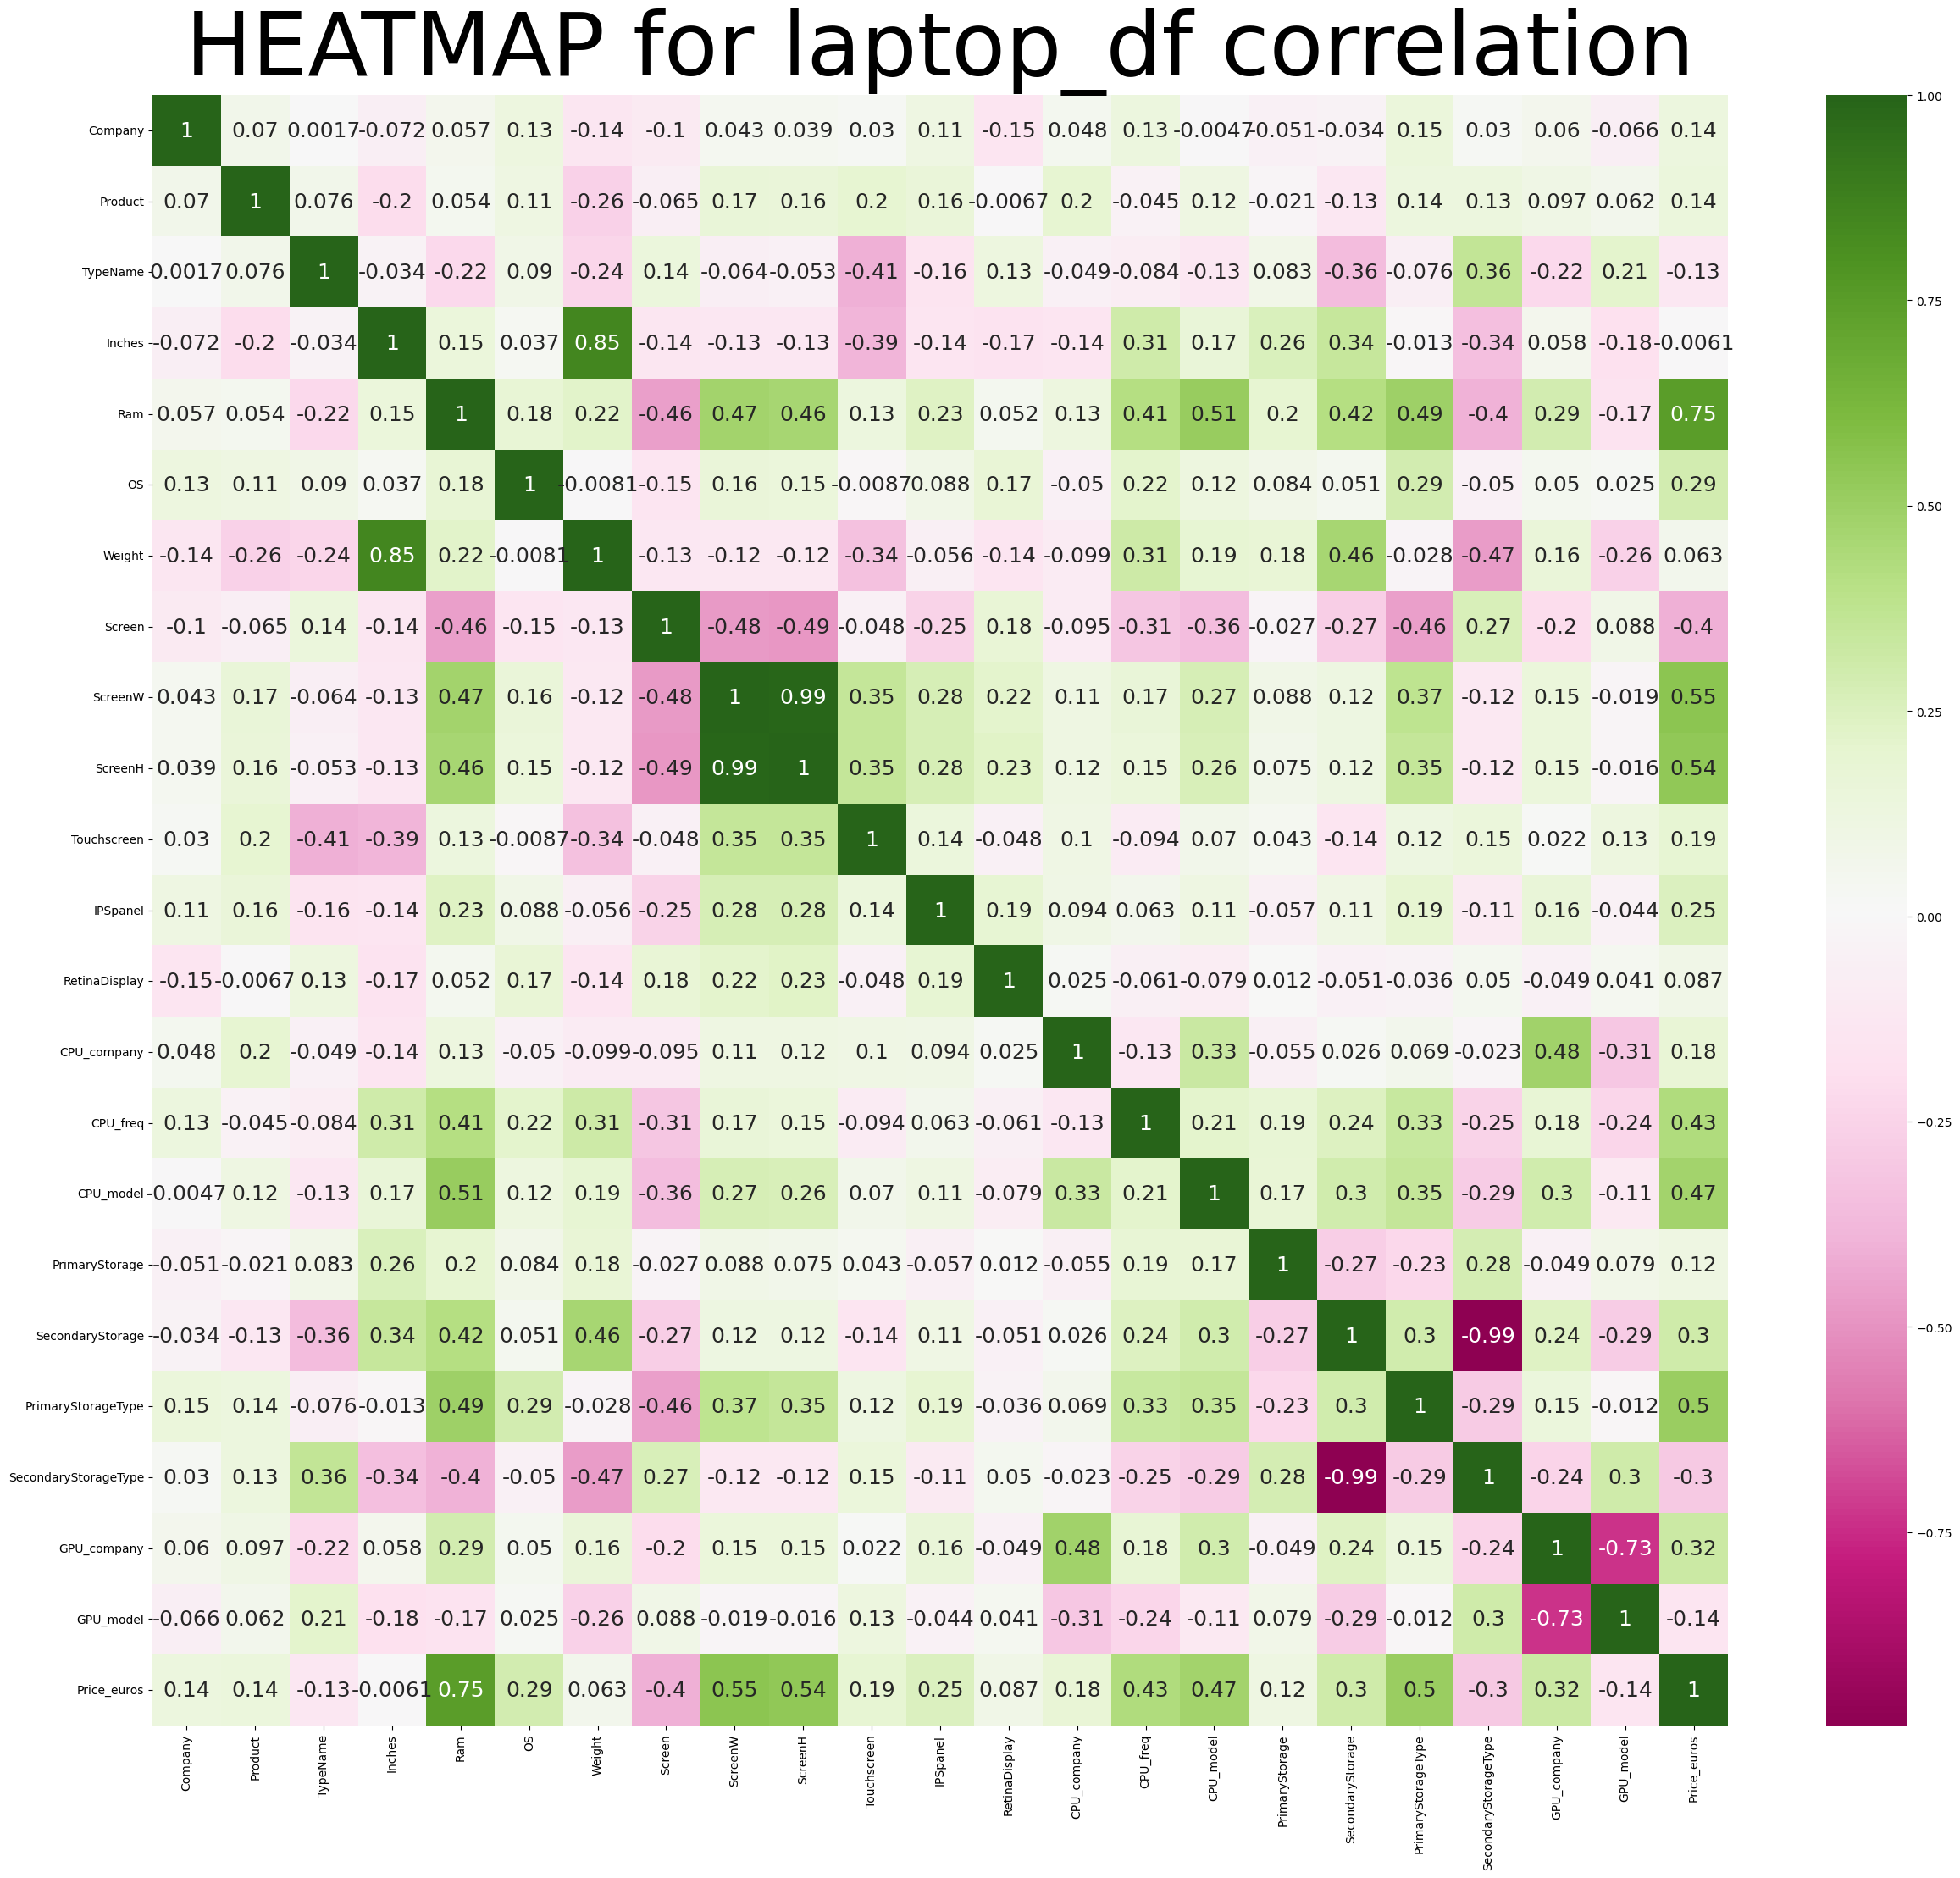

In [34]:
# heatmap and correlation

# figure size
plt.figure(figsize=(30,25))


# heatmap
sns.heatmap(data = laptop_df.corr(),
           annot = True,
           annot_kws={'size':18},
            cmap='PiYG'
           )
plt.title("HEATMAP for laptop_df correlation",fontsize=75)
plt.show()


<h4>
    Pearson Correlation Technique
</h4>
<p>
        In this pearson correlation we can filter out the correlation features that doesn't play much role to the predictor
    </p>

P-Value for the correlation :-

* 0.0001 = Strong
* 0.05 =   Moderate
* 0.1  =  Weak
* 0  = No

P-corr are values that are :
* -1 => large negative 
* +1 => large positive
* 0  => no correlation

In [36]:
# pearson correlation technique to filter out the features which are not correlated

# Initializing a list for storing the required features column names
required_col = []

# initializing our independent variables to a new variable for the pearson correlation 
# plap_df_X as indenpendent variables
plap_df_X = laptop_df.iloc[:,:22]

# plap_df_Y as dependent variable
plap_df_Y = laptop_df['Price_euros']

print(f"The correlation metrics that I've created for this is the ranges that are close to +1 and -1 ")
# plap_df_X[col[1]]
for col in plap_df_X.columns:
    plap_corr , plap_val = stats.pearsonr(plap_df_X[col] , plap_df_Y)
    if plap_corr <= -0.20:
        print(f"\n{col} , \ncorrelation : {plap_corr} , P-value :{plap_val} ,  Added")
        required_col.append(col)
    elif plap_corr >= 0.20:
        print(f"\n{col} , \ncorrelation : {plap_corr} , P-value :{plap_val} ,  Added")
        required_col.append(col)
    else:
        print(f"\n No correlation found for {col}")


required_col

The correlation metrics that I've created for this is the ranges that are close to +1 and -1 

 No correlation found for Company

 No correlation found for Product

 No correlation found for TypeName

 No correlation found for Inches

Ram , 
correlation : 0.7460069016679678 , P-value :5.103019030892525e-227 ,  Added

OS , 
correlation : 0.29019949354554575 , P-value :3.668339836646975e-26 ,  Added

 No correlation found for Weight

Screen , 
correlation : -0.4038338549650352 , P-value :3.3825963459886715e-51 ,  Added

ScreenW , 
correlation : 0.5531603056935845 , P-value :4.3308253824110746e-103 ,  Added

ScreenH , 
correlation : 0.5389911110624219 , P-value :5.543511774663729e-97 ,  Added

 No correlation found for Touchscreen

IPSpanel , 
correlation : 0.2507372219074975 , P-value :9.911351553777327e-20 ,  Added

 No correlation found for RetinaDisplay

 No correlation found for CPU_company

CPU_freq , 
correlation : 0.4263138614779614 , P-value :1.8721116069296022e-57 ,  Added

CPU_

['Ram',
 'OS',
 'Screen',
 'ScreenW',
 'ScreenH',
 'IPSpanel',
 'CPU_freq',
 'CPU_model',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company']

In [38]:
new_laptop_df = laptop_df[required_col]
new_laptop_df['Price_euros'] = laptop_df['Price_euros']
new_laptop_df

C:\Users\preda\AppData\Local\Temp\ipykernel_31996\2671576790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_laptop_df['Price_euros'] = laptop_df['Price_euros']


,Ram,OS,Screen,ScreenW,ScreenH,IPSpanel,CPU_freq,CPU_model,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price_euros
0,3,8,3,8,6,1,14,40,0,3,2,2,1339.69
1,3,8,3,1,1,0,8,40,0,0,2,2,898.94
2,3,4,1,3,2,0,16,46,0,3,2,2,575.00
3,5,8,3,10,7,1,18,54,0,3,2,0,2537.45
4,3,8,3,8,6,1,22,40,0,3,2,2,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1,5,1,3,2,1,16,55,0,3,2,2,638.00
1271,5,5,2,11,7,1,16,55,0,3,2,2,1499.00
1272,0,5,3,0,0,0,7,20,0,0,2,2,229.00
1273,2,5,3,0,0,0,16,55,0,1,2,0,764.00


In [39]:
# Now we will once again check if there are any duplicate datas present in the new data
# if so we will eliminate those duplicate data(rows)

# checking if there are any new duplicate rows present
print("Number Of Duplicated Rows : ",new_laptop_df.duplicated().sum())

# if yes we will drop all of them
new_laptop_df.drop_duplicates(inplace=True)

# rechecking whether if any duplicates found
print("Number Of Duplicated Rows : ",new_laptop_df.duplicated().sum())

Number Of Duplicated Rows :  17
Number Of Duplicated Rows :  0


C:\Users\preda\AppData\Local\Temp\ipykernel_31996\4232863940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_laptop_df.drop_duplicates(inplace=True)


# 4 . Standardizing the Data

Since we have all the categorical values we don't have to standardize or normalize the dataset because all the values that we have is in categorical values and not in numerical series.

# 5 . Visualizating the Data

* Scatter plot with a line plot

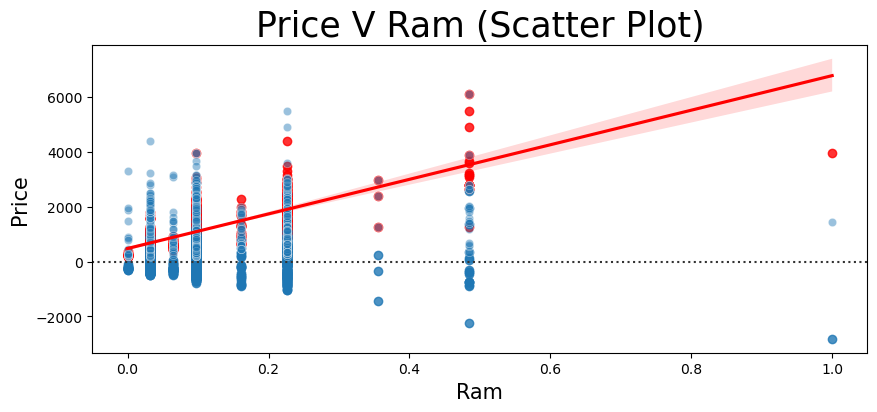

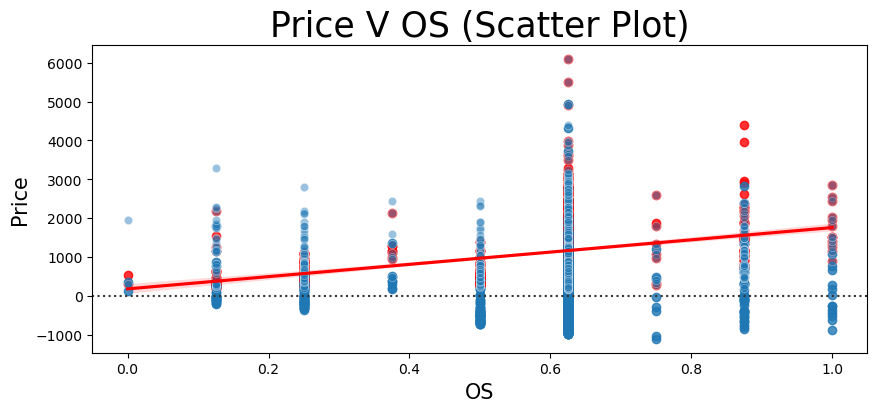

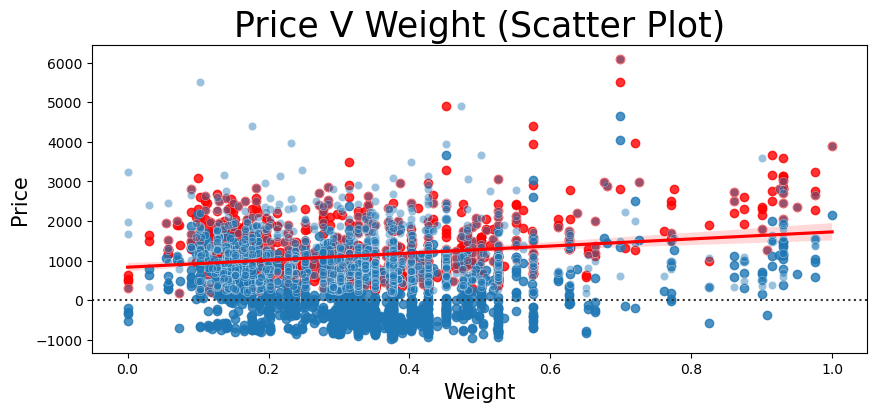

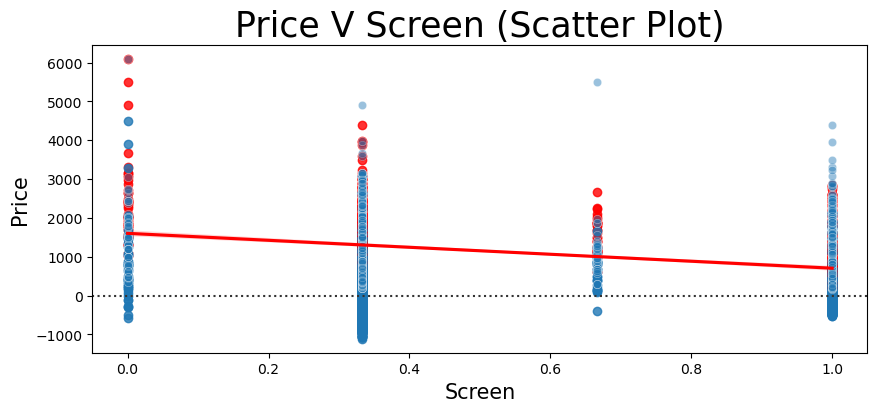

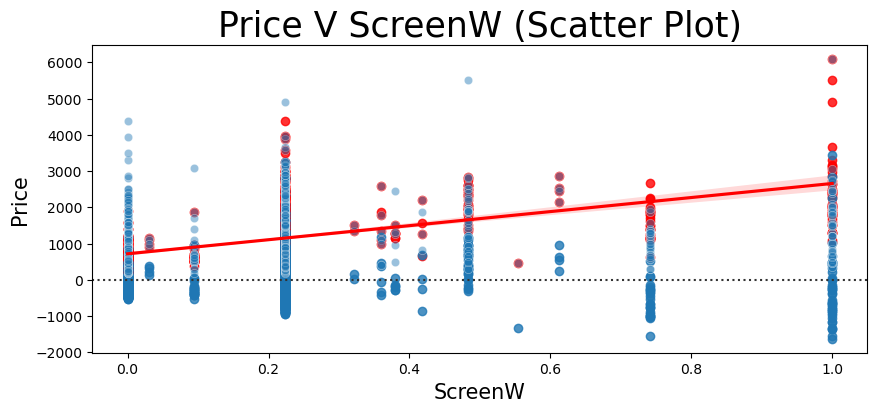

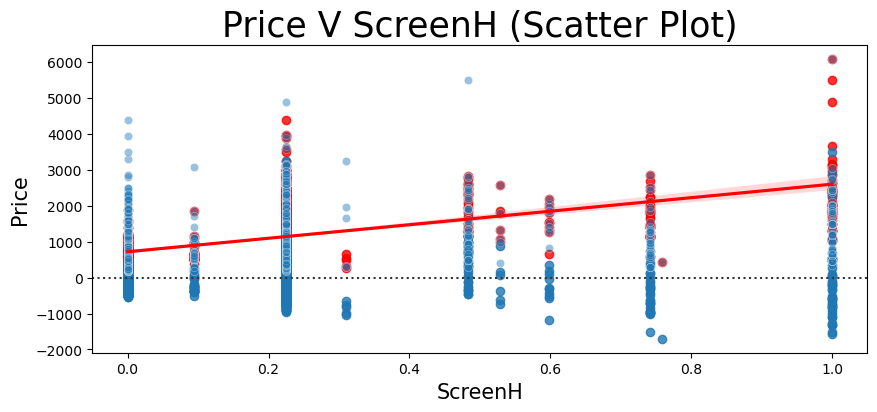

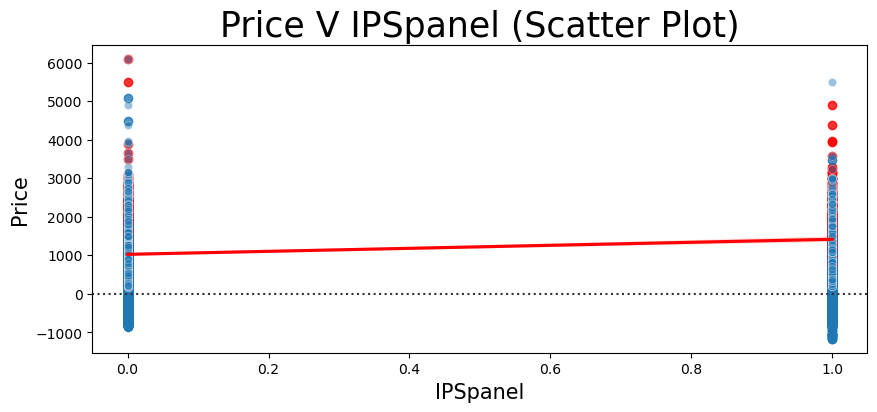

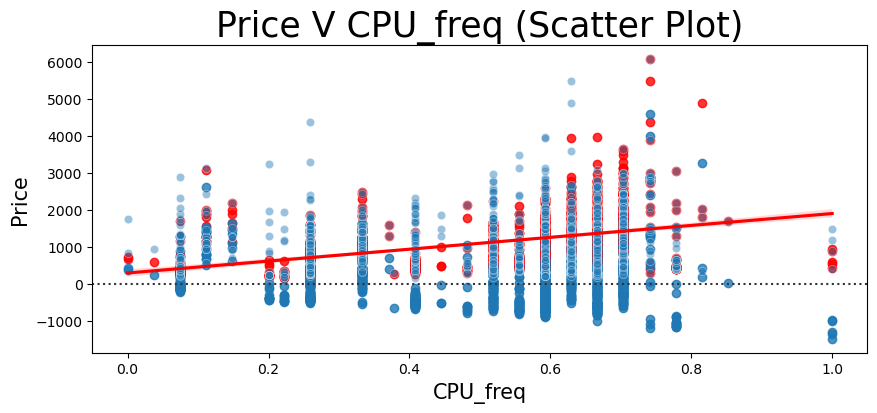

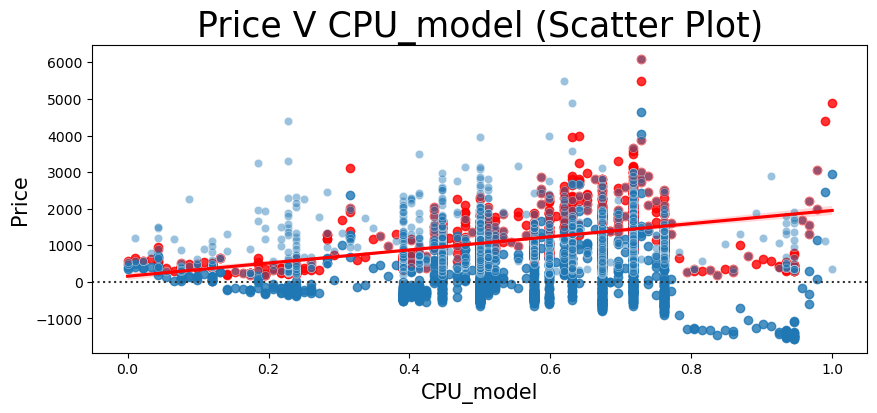

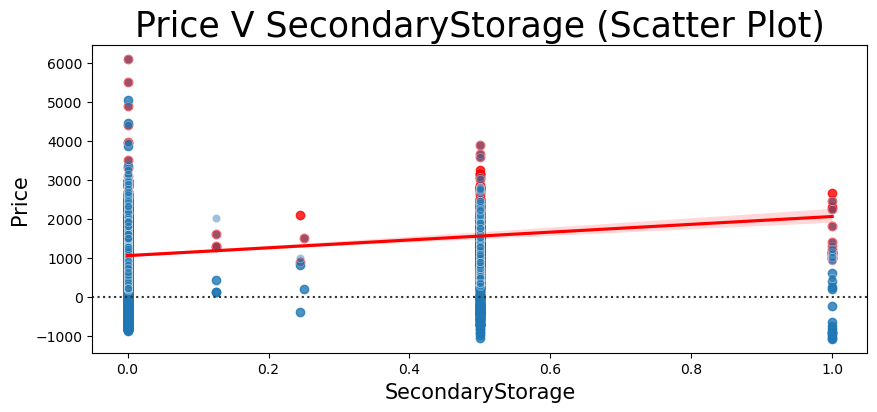

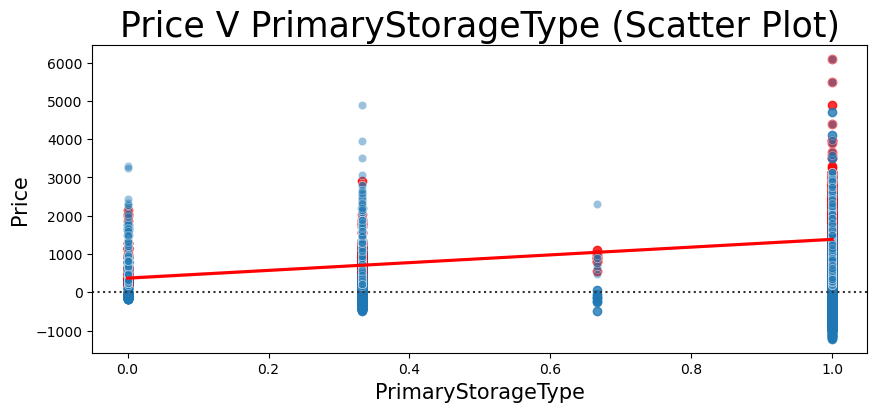

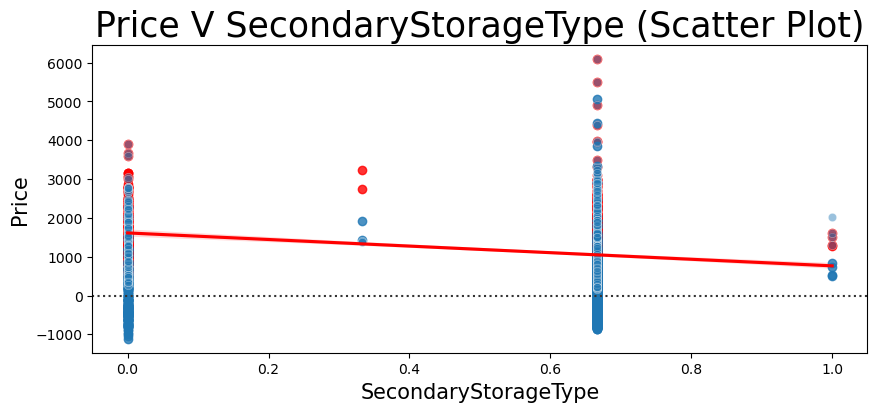

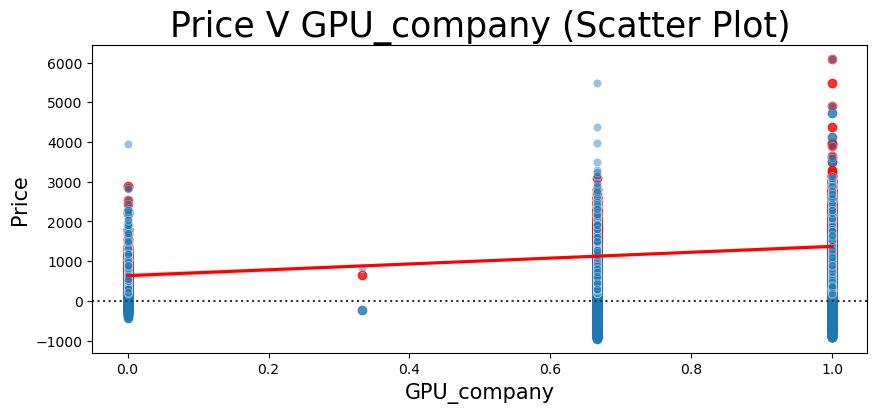

In [40]:
# scatter plot

for col in X_mMs_features.columns:
    plt.figure(figsize=(10,4))

    ax = sns.regplot(x = X_mMs_features[col],
                   y = price_Y, scatter=True,
                    color='red')

    ax1 = sns.residplot(x = X_mMs_features[col],
                   y = price_Y,
                       ax=ax)

    sns.scatterplot(x = X_mMs_features[col],
                   y = price_Y,
                   ax=ax1,
                   alpha=0.45)
    
    plt.title(f"Price V {col} (Scatter Plot)",fontsize=25)
    plt.xlabel(f"{col}",fontsize=15)
    plt.ylabel("Price",fontsize=15)
    
    plt.show()


# 6 . Splitting Data For Training and Testing

In [41]:
# train and test data 

X_train, X_test, y_train, y_test = train_test_split(X_mMs_features, price_Y , random_state=53 , test_size=0.2)

print(f"Train Data -> x : {X_train.shape},  y : {y_train.shape}")
print(f"Test Data  -> x : {X_test.shape},  y : {y_test.shape}")

Train Data -> x : (1018, 13),  y : (1018,)
Test Data  -> x : (255, 13),  y : (255,)


# 7 . Linear Model

<b>
    Linear Regression
</b>

In [42]:
linear_model = LinearRegression().fit(X_train,y_train)

linear_model_Y_predict = linear_model.predict(X_test)

print("Linear Model Training Score : ",linear_model.score(X_train,y_train))
print("Linear Model Testing Score : ",linear_model.score(X_test,y_test))


Linear Model Training Score :  0.6929438706504412
Linear Model Testing Score :  0.7328958173133135


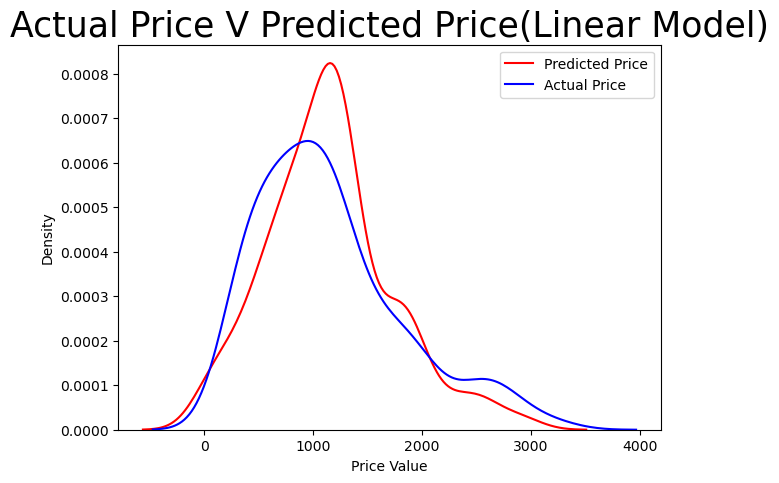

In [43]:
# plotting the graph for linear model and seeing the difference

plt.figure(figsize=(7,5))

ax = sns.kdeplot(linear_model_Y_predict, label='Predicted Price', color='red')
sns.kdeplot(y_test , label = "Actual Price", color='blue')

plt.title("Actual Price V Predicted Price(Linear Model)" , fontsize=25)
plt.xlabel("Price Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [44]:
# fitting the data with linear Model in a pipeline with polynomial regression feature

poly_degree = np.arange(1,6,1)

for i in poly_degree:

    print(f"{i}.")
    input1 = [("polynomial",PolynomialFeatures(degree=i)),("model",LinearRegression())]

    Lr_Pf_Pipe = Pipeline(input1)

    print(Lr_Pf_Pipe)
    
    # fitting the pipeline model
    Lr_Pf_Pipe.fit(X_train,y_train)

    # Now lets predict the outcome 
    linear_model_Yhat = Lr_Pf_Pipe.predict(X_test)

    # Checking the accuracy score from linear model itself
    # train score
    
    print(f"Training Score : {Lr_Pf_Pipe.score(X_train,y_train)}")

    # test score
    print(f"Testing Score  :{Lr_Pf_Pipe.score(X_test,y_test)}")
    
    # accuracy scores for random forest regression 
    linear_r2score = r2_score(y_test, linear_model_Y_predict)
    linear_mse = mean_squared_error(y_test, linear_model_Y_predict)
    linear_mae = mean_absolute_error(y_test, linear_model_Y_predict)

    # Output for the accuracies
    print()
    print(f"R2 Score for Linear Regression : {linear_r2score}")
    print(f"Mean Squared Error : {linear_mse}")
    print(f"Mean Absolute Error : {linear_mae}")
    
    print()


1.
Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('model', LinearRegression())])
Training Score : 0.6929438706504412
Testing Score  :0.7328958173133135

R2 Score for Linear Regression : 0.7328958173133135
Mean Squared Error : 120451.51320518066
Mean Absolute Error : 272.8666003220039

2.
Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])
Training Score : 0.8352370171013863
Testing Score  :0.7565372681316671

R2 Score for Linear Regression : 0.7328958173133135
Mean Squared Error : 120451.51320518066
Mean Absolute Error : 272.8666003220039

3.
Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])
Training Score : 0.90972387758395
Testing Score  :-817395249754.9917

R2 Score for Linear Regression : 0.7328958173133135
Mean Squared Error : 120451.51320518066
Mean Absolute Error : 272.8666003220039

4.
Pipeline(steps=[('polynomial', PolynomialFeatures(deg

* Using polynomial features we get the best result in `degree` = `2`
* `Testing Score` = `75.65`

# 8 . Ridge Regression 

<h4>GridserachCV with Ridge Regression</h4>

In [45]:
param = {'alpha':[0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000]}

grid = GridSearchCV(Ridge(), param_grid=param , cv=5)

grid.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100,
                                   1000, 10000]})

* Ridge Regression with Grid Search CV

In [46]:
result_ridge_model = grid.cv_results_
ridge_grid_model_df = pd.DataFrame(result_ridge_model)
ridge_grid_model_df[ridge_grid_model_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.003594,0.001019,0.001799,0.000401,0.1,{'alpha': 0.1},0.748157,0.676558,0.638104,0.663153,0.692386,0.683671,0.03683,1


Here we are getting the `alpha` as `0.1` and 

the `rank` as `1` and 

the `test accuracy` as `68.36%`

<b>Cross Val Score with Ridge Regression</b>

In [47]:
# Rd_train_squared = []
# Rd_test_squared = []
cv_scores = []
alpha_features = [0.001,0.01,0.1,1,10]

for  i in alpha_features:
        Rr_linear_model = Ridge(alpha=i)
        
        # Rr_linear_model.fit(X_train, y_train)
        
        # print(f"Training Score : {Rr_linear_model.score(X_train, y_train)}")
        # print(f"Testing Score  : {Rr_linear_model.score(X_test, y_test)}")
        
        cvs = cross_val_score(Rr_linear_model, X_train, y_train, cv=5)
        
        # Rd_train_squared.append(round((Rr_linear_model.score(X_train, y_train))*100,10))
        # Rd_test_squared.append(round((Rr_linear_model.score(X_test, y_test))*100,10))
        
        cv_scores.append(np.mean(cvs))

In [48]:
Ridge_linear_df = pd.DataFrame({"alpha's":alpha_features,"CV_Scores":cv_scores})
Ridge_linear_df

,alpha's,CV_Scores
0,0.001,0.683438
1,0.010,0.683487
2,0.100,0.683671
3,1.000,0.676198
4,10.000,0.602910


So here the best model and `alpha` parameter is `0.10`
of `accuracy` as `68.36`

# 9 . Bayessian Ridge

In [49]:
# using bayessian ridge regression 
by_rd_model = BayesianRidge().fit(X_train, y_train)

# bayessian yhat predict
bayessian_Ypredict = by_rd_model.predict(X_test)

# model score for training and testing data on Bayessian Ridge Regression
print(f"Training Data Score for Bayessian Ridge Model {by_rd_model.score(X_train, y_train)}")
print(f"Testing Data Score for Bayessian Ridge Model {by_rd_model.score(X_test,y_test)}")


# bysn accuracy score
byssn_r2score = r2_score(y_test, bayessian_Ypredict)
byssn_mse = mean_squared_error(y_test, bayessian_Ypredict)
byssn_mae = mean_absolute_error(y_test, bayessian_Ypredict)

# Output for the accuracies
print(f"R2 Score for bayessian Regression : {byssn_r2score}")
print(f"Mean Squared Error : {byssn_mse}")
print(f"Mean Absolute Error : {byssn_mae}")

Training Data Score for Bayessian Ridge Model 0.6928154302471354
Testing Data Score for Bayessian Ridge Model 0.7324487565811953
R2 Score for bayessian Regression : 0.7324487565811953
Mean Squared Error : 120653.11671859854
Mean Absolute Error : 273.4968958702149


# 10 . Poisson Regression

In [50]:
# Using the poisson regression methods 
poiss_model = PoissonRegressor().fit(X_train,y_train)

# poisson predict
poisson_y_predict = poiss_model.predict(X_test)

# model score for training and testing data for Poisson Regression
print(f"Training Data Score for Poisson Regression Model {poiss_model.score(X_train, y_train)}")
print(f"Testing Data Score for Poisson Regression Model {poiss_model.score(X_test,y_test)}")

# Accuracy scores for poisson regression prediction on test data
poiss_r2score = r2_score(y_test, poisson_y_predict)
poiss_mse = mean_squared_error(y_test, poisson_y_predict)
poiss_mae = mean_absolute_error(y_test, poisson_y_predict)

# Output for the accuracies
print(f"R2 Score for Poisson Regression : {poiss_r2score}")
print(f"Mean Squared Error : {poiss_mse}")
print(f"Mean Absolute Error : {poiss_mae}")


Training Data Score for Poisson Regression Model 0.7157092614352676
Testing Data Score for Poisson Regression Model 0.7315774524104971
R2 Score for Poisson Regression : 0.7210511676448474
Mean Squared Error : 125792.89708618674
Mean Absolute Error : 273.0776069683573


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


# 11 . KNeigbhors Regression

In [51]:
# using the knnregressor for the regression model 
knr_model = KNeighborsRegressor(4).fit(X_train,y_train)

# predicting the y for knr
knr_y_predict = knr_model.predict(X_test)

# model score for training and testing data for KNeighbors Regression
print(f"Training Data Score for KNeighbor Regression Model {knr_model.score(X_train, y_train)}")
print(f"Testing Data Score for KNeighbor Regression Model {knr_model.score(X_test,y_test)}")

# prediction analysis for knregressor for the test data
knr_r2score = r2_score(y_test, knr_y_predict)
knr_mse = mean_squared_error(y_test, knr_y_predict)
knr_mae = mean_absolute_error(y_test, knr_y_predict)

# Output for the accuracies
print(f"R2 Score for KNeighbor Regression : {knr_r2score}")
print(f"Mean Squared Error : {knr_mse}")
print(f"Mean Absolute Error : {knr_mae}")


Training Data Score for KNeighbor Regression Model 0.8244688099002709
Testing Data Score for KNeighbor Regression Model 0.745065757336753
R2 Score for KNeighbor Regression : 0.745065757336753
Mean Squared Error : 114963.43856443625
Mean Absolute Error : 249.76714705882355


# 12 . Random Forest Regressor

In [52]:
# random forest regression 
rfr_model = RandomForestRegressor(n_estimators=550 ,random_state=53)

# fit the data to the model
rfr_model.fit(X_train,y_train)

# Random Forest Regressor training and testing score
print(f"Training Data Score for Random Forest Regression Model {rfr_model.score(X_train, y_train)}")
print(f"Testing Data Score for Random Forest Regression Model {rfr_model.score(X_test,y_test)}")

# prediction for rfr_model
rfr_y_predict = rfr_model.predict(X_test)

# accuracy scores for random forest regression 
rfr_r2score = r2_score(y_test, rfr_y_predict)
rfr_mse = mean_squared_error(y_test, rfr_y_predict)
rfr_mae = mean_absolute_error(y_test, rfr_y_predict)

# Output for the accuracies
print(f"R2 Score for Random Forest Regression : {rfr_r2score}")
print(f"Mean Squared Error : {rfr_mse}")
print(f"Mean Absolute Error : {rfr_mae}")

Training Data Score for Random Forest Regression Model 0.9682961640607155
Testing Data Score for Random Forest Regression Model 0.8318383565380821
R2 Score for Random Forest Regression : 0.8318383565380821
Mean Squared Error : 75833.04841698268
Mean Absolute Error : 190.35409670250266


This accuracy shows that our Random Forest Regressor has potential for improving the accuracy overall

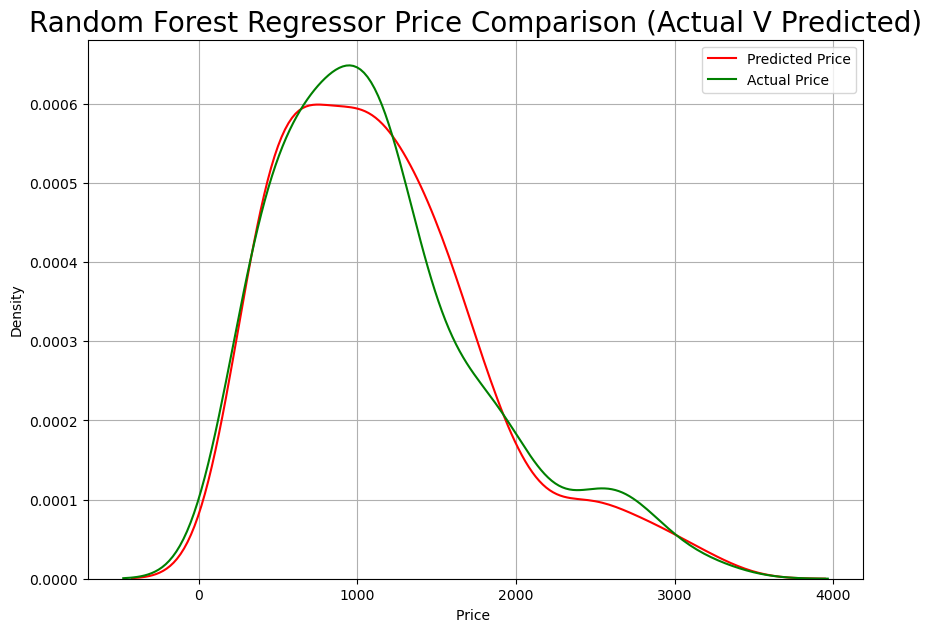

In [53]:
# Random Forest Regressor kdeplot between actual price and predictive price

plt.figure(figsize=(10,7))

ax= sns.kdeplot(rfr_y_predict , label="Predicted Price", color='red')

sns.kdeplot(y_test, label="Actual Price", color='green')

plt.title("Random Forest Regressor Price Comparison (Actual V Predicted)", fontsize=20)
plt.xlabel("Price ")
plt.ylabel("Density")
plt.grid(True)
plt.legend()

plt.show()


In [54]:
# using grid searchcv for hyperparameter tuning for random forest regression

# initializing the model
rfr_model2 = RandomForestRegressor()

# Define the parameter grid 
param_grid = { 'n_estimators': [300,400,550,500,600],
              'max_depth': [80,85,90,95,100],
              'min_samples_split' : [2,5],
              'min_samples_leaf' : [1,2]
             }

# using gridsearchcv for better hyperparameter tuning
grid_rfr = GridSearchCV(estimator = rfr_model2 , param_grid = param_grid, cv=5)

# fitting the data
grid_rfr.fit(X_train,y_train)

# grid results
grid_rfr_df_results = pd.DataFrame(grid_rfr.cv_results_)
grid_rfr_df_results



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.039546,0.044489,0.025231,0.004738,80,1,2,300,"{'max_depth': 80, 'min_samples_leaf': 1, 'min_...",0.800734,0.789490,0.722704,0.819653,0.816769,0.789870,0.035327,25
1,1.396984,0.028019,0.035308,0.004947,80,1,2,400,"{'max_depth': 80, 'min_samples_leaf': 1, 'min_...",0.801001,0.786825,0.717263,0.818738,0.816434,0.788052,0.037222,45
2,1.954829,0.126441,0.041215,0.004839,80,1,2,550,"{'max_depth': 80, 'min_samples_leaf': 1, 'min_...",0.805239,0.791093,0.718839,0.822915,0.814324,0.790482,0.037340,13
3,1.706673,0.061082,0.040430,0.008065,80,1,2,500,"{'max_depth': 80, 'min_samples_leaf': 1, 'min_...",0.802977,0.789479,0.719019,0.821107,0.815363,0.789589,0.036924,28
4,2.128605,0.128939,0.045737,0.002173,80,1,2,600,"{'max_depth': 80, 'min_samples_leaf': 1, 'min_...",0.804137,0.790521,0.723991,0.816330,0.816656,0.790327,0.034527,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.800549,0.029231,0.020188,0.001665,100,2,5,300,"{'max_depth': 100, 'min_samples_leaf': 2, 'min...",0.805285,0.764717,0.712170,0.823378,0.810877,0.783286,0.040632,68
96,1.077257,0.097758,0.026320,0.002878,100,2,5,400,"{'max_depth': 100, 'min_samples_leaf': 2, 'min...",0.802459,0.772375,0.709438,0.819924,0.811032,0.783046,0.040130,74
97,1.491231,0.070072,0.039913,0.005709,100,2,5,550,"{'max_depth': 100, 'min_samples_leaf': 2, 'min...",0.802013,0.773479,0.706565,0.819155,0.810097,0.782262,0.040824,90
98,1.311333,0.022331,0.031285,0.001854,100,2,5,500,"{'max_depth': 100, 'min_samples_leaf': 2, 'min...",0.795783,0.766944,0.710305,0.820739,0.808975,0.780549,0.039433,99


In [55]:
grid_rfr_df_results[grid_rfr_df_results['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,1.40984,0.06431,0.040049,0.007083,80,1,5,500,"{'max_depth': 80, 'min_samples_leaf': 1, 'min_...",0.812315,0.785505,0.724666,0.827163,0.811483,0.792226,0.036344,1


The above data shows us that the `rank 1` = `1st` row

where the `testing_accuracy_mean` is `79.27`

This shows that while using the gridsearchCv the accuracy has depleted

so we dont have to use gridsearchcv 

# 13 . eXtreme Gradient Boosting Regressor 

In [56]:
# creating an object for XGBRegressor()
xgbr_model = XGBRegressor(random_state=2018)

# fitting the model
xgbr_model.fit(X_train, y_train)

# predicting the y variables
xgbr_y_predict = xgbr_model.predict(X_test)

## training and testing scores for XGBregressor
print(f"Training Data Score for XGBRegression Model {xgbr_model.score(X_train, y_train)}")
print(f"Testing Data Score for XGBRegression Model {xgbr_model.score(X_test,y_test)}")

# accuracy scores for random forest regression 
xgb_r2score = r2_score(y_test, xgbr_y_predict)
xgb_mse = mean_squared_error(y_test, xgbr_y_predict)
xgb_mae = mean_absolute_error(y_test, xgbr_y_predict)

# Output for the accuracies
print(f"R2 Score for eXtreme Gradient Boosting Regression : {xgb_r2score}")
print(f"Mean Squared Error : {xgb_mse}")
print(f"Mean Absolute Error : {xgb_mae}")


Training Data Score for XGBRegression Model 0.9848364933401395
Testing Data Score for XGBRegression Model 0.8266711466041738
R2 Score for eXtreme Gradient Boosting Regression : 0.8266711466041738
Mean Squared Error : 78163.21879966877
Mean Absolute Error : 189.81270646158853


The data showed a slight difference in the testing score let us also boost the performance after performing XGBoost regressor

# 14 . XGBoost and Random Forest Regressor

In [66]:
# initializing the xgbrfregressor
xgbrfr_model = XGBRFRegressor(random_state=53 , n_estimators=600, learning_rate = 1)

# fit the model
xgbrfr_model.fit(X_train, y_train)

# prediction values
xgbrfr_y_predict = xgbrfr_model.predict(X_test)

# training and testing scores for XGBRFregressor
print(f"Training Data Score for XGBRF Regression Model {xgbrfr_model.score(X_train, y_train)}")
print(f"Testing Data Score for XGBRF Regression Model {xgbrfr_model.score(X_test,y_test)}")

# accuracy scores for random forest regression 
xgbrf_r2score = r2_score(y_test, xgbrfr_y_predict)
xgbrf_mse = mean_squared_error(y_test, xgbrfr_y_predict)
xgbrf_mae = mean_absolute_error(y_test, xgbrfr_y_predict)

# Output for the accuracies
print(f"R2 Score for eXtreme Gradient Boosting Random Forest Regression : {xgbrf_r2score}")
print(f"Mean Squared Error : {xgbrf_mse}")
print(f"Mean Absolute Error : {xgbrf_mae}")

Training Data Score for XGBRF Regression Model 0.8560044037999207
Testing Data Score for XGBRF Regression Model 0.8072801706023947
R2 Score for eXtreme Gradient Boosting Random Forest Regression : 0.8072801706023947
Mean Squared Error : 86907.64345991229
Mean Absolute Error : 212.52973999980853


# 15 .  Exporting the model 

In [67]:
# using the pickle library we will now import xgbrfregressor model 

with open('xgbrfr_laptop_price_prediction_model','wb') as f1:
    pickle.dump(xgbrfr_model , f1)
